<a href="https://colab.research.google.com/github/NishaimLimbu/classes/blob/main/Image_recognition(cifar_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
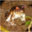

In [15]:
x_train[0]

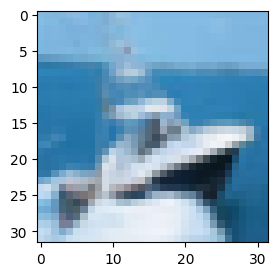

In [16]:
plt.figure(figsize=(15,3))
plt.imshow(x_train[8])

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
# Class labels
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']

In [20]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

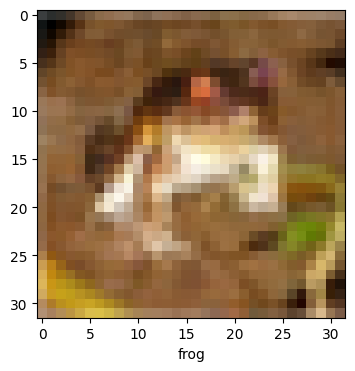

In [21]:
plot_sample(x_train,y_train,0)

In [22]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [23]:
# Build the CNN
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # ← properly closed here
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [25]:
# Train model
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3246 - loss: 1.8050
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5747 - loss: 1.1936
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6483 - loss: 1.0024
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6921 - loss: 0.8765
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7282 - loss: 0.7767


In [26]:
# Evaluate model
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6964 - loss: 0.8943


[0.9049853682518005, 0.6919999718666077]

In [27]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.6957441e-03, 1.6947741e-03, 2.1784212e-03, 9.2666429e-01,
        1.4129626e-03, 4.6079997e-02, 3.9552981e-03, 3.0297299e-03,
        5.3873784e-03, 7.9013417e-03],
       [2.7312350e-03, 1.8805020e-02, 1.6221804e-05, 1.5908530e-05,
        3.0111698e-06, 1.5359630e-06, 3.5797284e-06, 1.8959901e-06,
        9.7790742e-01, 5.1418674e-04],
       [1.6643852e-01, 3.0915073e-01, 1.7047752e-02, 2.2179576e-02,
        8.7701781e-03, 6.8042125e-03, 1.3712290e-02, 6.5839649e-03,
        3.6364582e-01, 8.5666947e-02],
       [7.4566495e-01, 7.7579236e-03, 9.4256379e-02, 9.2368275e-03,
        1.6470758e-02, 1.2000515e-03, 6.1840997e-03, 5.3666532e-04,
        1.1588240e-01, 2.8099921e-03],
       [4.9959170e-05, 1.0186631e-05, 1.0534015e-02, 1.3759477e-02,
        4.9165404e-01, 5.8103623e-03, 4.7773144e-01, 4.3197235e-04,
        3.7425843e-06, 1.4845454e-05]], dtype=float32)

In [28]:
# Predict
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:15]

[np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(0),
 np.int64(4),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(9),
 np.int64(0),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(9)]

In [29]:
y_test = y_test.reshape(-1,)

In [30]:
# actual
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

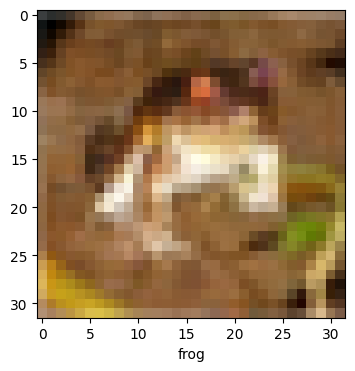

In [31]:
plot_sample(x_train,y_train,0)

In [32]:
classes[y_classes[19]] #True

'frog'

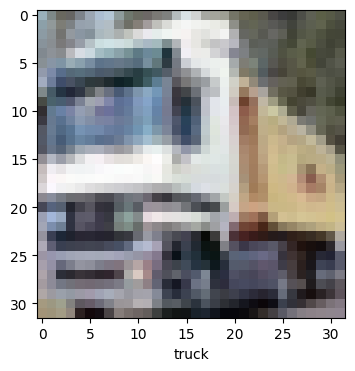

In [33]:
plot_sample(x_train,y_train,1)

In [34]:
classes[y_classes[1]]  #False

'ship'

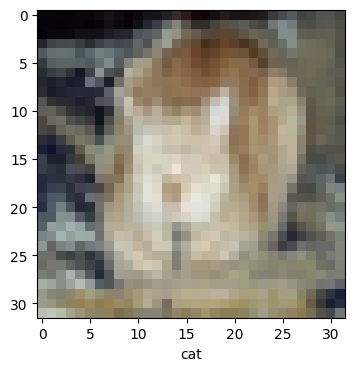

In [35]:
plot_sample(x_train,y_train,33)

In [36]:
classes[y_classes[33]]  #True

'cat'

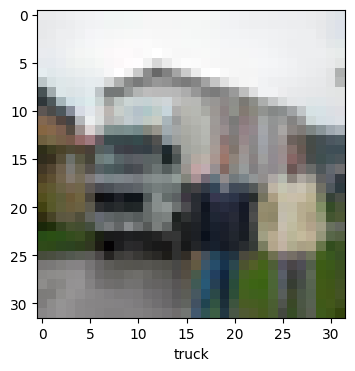

In [37]:
plot_sample(x_train,y_train,16)

In [38]:
classes[y_classes[16]] #False

'dog'

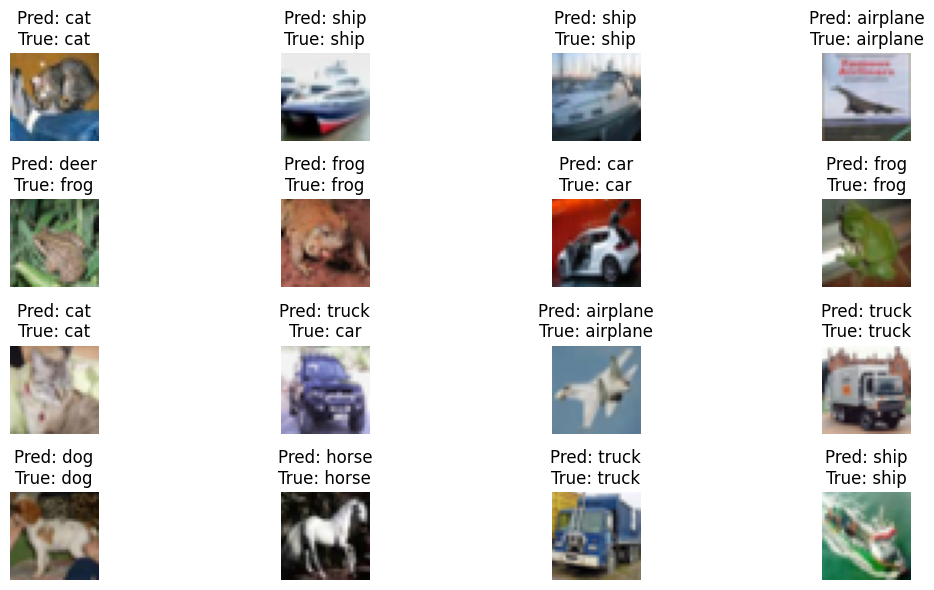

In [39]:
plt.figure(figsize=(12,6))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {classes[y_classes[i]]}\nTrue: {classes[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [43]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_classes)

Text(95.72222222222221, 0.5, 'truth')

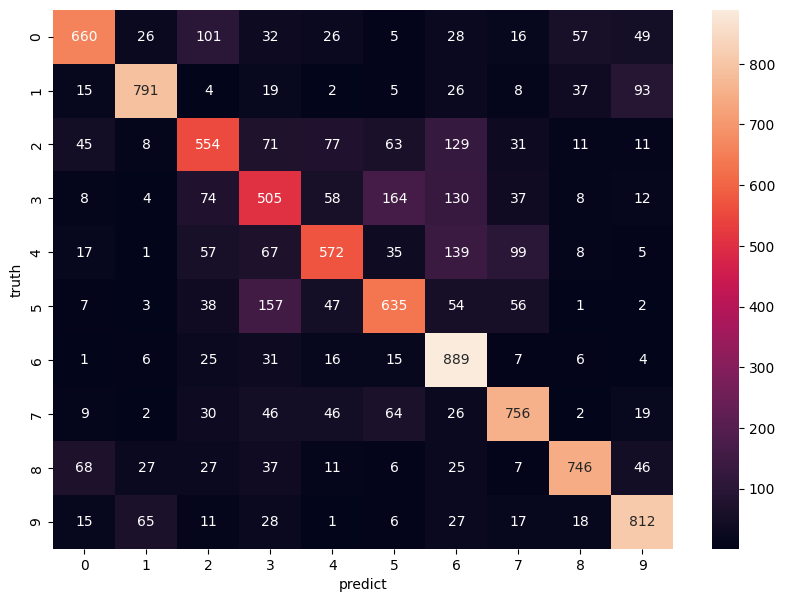

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predict')
plt.ylabel('truth')

In [42]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_classes)